In [ ]:
import numpy as np

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
# load the data
data = [
    ("This is a positive sentence", "positive"),("This is a negative sentence", "negative"),
    ("I am happy", "positive"),("I am sad", "negative")]
# extract features from text
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform([d[0] for d in data])
y = [d[1] for d in data]
# train the model
model = BernoulliNB()
model.fit(X, y)
# predict the class of a new sentence
new_sentence = "This is a positive sentence"
X_new = vectorizer.transform([new_sentence])
predicted_class = model.predict(X_new)
print(predicted_class)

['positive']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# load the data
data = [("This is a positive sentence", "positive"),("This is a negative sentence", "negative"),
    ("I am happy", "positive"),("I am sad", "negative")]
# extract features from text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([d[0] for d in data])
y = [d[1] for d in data]
# train the model
model = MultinomialNB()
model.fit(X, y)
# predict the class of a new sentence
new_sentence = "This is a nagetive sentence"
X_new = vectorizer.transform([new_sentence])
predicted_class = model.predict(X_new)
print(predicted_class)


['negative']


#Classification with categorical data:


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# load the data
data = [
    ["Red", "Small", "Circle", "Apple"],
    ["Green", "Large", "Square", "Kiwi"],
    ["Red", "Medium", "Circle", "Cherry"],
    ["Yellow", "Small", "Triangle", "Lemon"]
]

# convert categorical data to numerical labels
le = LabelEncoder()
for i in range(len(data[0])):
  data[:, i] = le.fit_transform(data[:, i])

# split features and labels
X = data[:, :-1]
y = data[:, -1]

# train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# predict the class of a new example
new_example = ["Green", "Small", "Square"]
new_example = le.transform(new_example)
predicted_class = model.predict([new_example])
print(predicted_class)


TypeError: ignored

#

#Classification with numerical data:



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# load the data
data = [    [1, 1, 1, "A"],
    [2, 2, 2, "B"],
    [3, 3, 3, "B"],
    [4, 4, 4, "A"]
]

# split features and labels
X = [d[:-1] for d in data]
y = [d[-1] for d in data]

# train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# predict the class of a new example
new_example = [1,1,1]
predicted_class = model.predict([new_example])
print(predicted_class)


['A']


#Regression with categorical data:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# load the data
data = [
    ["Red", "Small", "Circle", 10],
    ["Green", "Large", "Square", 20],
    ["Red", "Medium", "Circle", 15],
    ["Yellow", "Small", "Triangle", 5]
]

# convert categorical data to numerical labels
le = LabelEncoder()
for i in range(len(data[0])-1):
    data[:, i] = le.fit_transform(data[:, i])

# split features and labels
X = data[:, :-1]
y = data[:, -1]

# train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# predict the value of a new example
new_example = ["Green", "Small", "Square"]
new_example = le.transform(new_example)
predicted_value = model.predict([new_example])
print(predicted_value)


TypeError: ignored

#Regression with numerical data:



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# load the data
data = [    [1, 2, 3, 10],
    [2, 3, 4, 20],
    [3, 4, 5, 30],
    [4, 5, 6, 40]
]

# split features and labels
X = [d[:-1] for d in data]
y = [d[-1] for d in data]

# train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# predict the value of a new example
new_example = [2, 3, 4]
predicted_value = model.predict([new_example])
print(predicted_value)


[20.]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

# load the data
data = [    ["Red", "Small", "Circle", 10],
    ["Green", "Large", "Square", 20],
    ["Red", "Medium", "Circle", 15],
    ["Yellow", "Small", "Triangle", 5]
]

# convert categorical data to one-hot encoding
enc = OneHotEncoder()
X_cat = enc.fit_transform(data[:, :-1]).toarray()
y = data[:, -1]

# train the model
model = DecisionTreeRegressor()
model.fit(X_cat, y)

# predict the value of a new example
new_example = ["Green", "Small", "Square"]
new_example = enc.transform([new_example]).toarray()
predicted_value = model.predict(new_example)
print(predicted_value)


TypeError: ignored

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
import pandas as pd
# load the data
data = [["Red", "Small", "Circle", 10],
    ["Green", "Large", "Square", 20],
    ["Red", "Medium", "Circle", 15],
    ["Yellow", "Small", "Triangle", 5]]
df = pd.DataFrame(data, columns=['color', 'size', 'shape', 'value'])
# split features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# create and train the model
model = CatBoostRegressor(cat_features=['color', 'size', 'shape'])
model.fit(X, y)

# predict the value of a new example
new_example = pd.DataFrame([["Green", "Small", "Square"]], columns=['color', 'size', 'shape'])
predicted_value = model.predict(new_example)
print(predicted_value)

Learning rate set to 0.017112
0:	learn: 5.5881827	total: 46.9ms	remaining: 46.8s
1:	learn: 5.5576366	total: 47.5ms	remaining: 23.7s
2:	learn: 5.5397982	total: 47.8ms	remaining: 15.9s
3:	learn: 5.5095686	total: 48.3ms	remaining: 12s
4:	learn: 5.5095686	total: 48.6ms	remaining: 9.67s
5:	learn: 5.4795880	total: 49ms	remaining: 8.12s
6:	learn: 5.4620352	total: 49.3ms	remaining: 7s
7:	learn: 5.4323662	total: 49.7ms	remaining: 6.16s
8:	learn: 5.4091265	total: 50.4ms	remaining: 5.55s
9:	learn: 5.3798286	total: 50.8ms	remaining: 5.03s
10:	learn: 5.3507732	total: 51.2ms	remaining: 4.6s
11:	learn: 5.3336382	total: 51.5ms	remaining: 4.24s
12:	learn: 5.3166529	total: 51.9ms	remaining: 3.94s
13:	learn: 5.2960027	total: 52.4ms	remaining: 3.69s
14:	learn: 5.2792438	total: 52.8ms	remaining: 3.46s
15:	learn: 5.2626314	total: 53.1ms	remaining: 3.27s
16:	learn: 5.2461642	total: 53.5ms	remaining: 3.09s
17:	learn: 5.2177339	total: 55.1ms	remaining: 3s
18:	learn: 5.1974839	total: 55.7ms	remaining: 2.88s
19:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.865


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
base_model = DecisionTreeClassifier(max_depth=5)
model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.89


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
params = {"objective": "binary:logistic", "max_depth": 5}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain, num_boost_round=10)

# evaluate the model on the test set
predictions = model.predict(dtest)
accuracy = sum(predictions.round() == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.88


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Generate some synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Define meta model
meta_model = LogisticRegression(random_state=42)

# Define cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train base models and generate predictions
train_meta = np.zeros((len(y_train), 2))
test_meta = np.zeros((len(y_test), 2))
for i, model in enumerate([rf_model, gb_model]):
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        model.fit(X_train_fold, y_train_fold)
        train_meta[val_index, i] = model.predict_proba(X_val_fold)[:, 1]
    test_meta[:, i] = model.predict_proba(X_test)[:, 1]

# Train meta model on predictions
meta_model.fit(train_meta, y_train)

# Generate final predictions
train_preds = meta_model.predict(train_meta)
test_preds = meta_model.predict(test_meta)

# Evaluate final model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


Train accuracy: 0.92
Test accuracy: 0.96


#Decision Trees for Classification with Categorical Data


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


#Decision Trees for Regression with Numerical Data


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.935672514619883


#Decision Trees for Regression with the California Housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california = fetch_california_housing()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.3, random_state=42)

# Create a decision tree regressor object
clf = DecisionTreeRegressor()
# Train the regressor on the training data
clf.fit(X_train, y_train)

# Test the regressor on the testing data and print the mean squared error
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5242667269582848


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create a random forest classifier object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy score
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")


Accuracy Score: 1.0


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the iris dataset
iris = load_iris()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create a random forest classifier object with 100 trees
rf = RandomForestClassifier(n_estimators=100)
# Create a bagging classifier object with 10 random forest classifiers
bagging = BaggingClassifier(estimator=rf, n_estimators=10)
# Train the bagging classifier on the training data
bagging.fit(X_train, y_train)
# Test the bagging classifier on the testing data and print the accuracy score
y_pred = bagging.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")

Accuracy Score: 1.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the iris dataset
iris = load_iris()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create a decision tree classifier object
dt = DecisionTreeClassifier(max_depth=1)
# Create an AdaBoost classifier object with 100 decision tree classifiers
adaboost = AdaBoostClassifier(estimator=dt, n_estimators=100)
# Train the AdaBoost classifier on the training data
adaboost.fit(X_train, y_train)
# Test the AdaBoost classifier on the testing data and print the accuracy score
y_pred = adaboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")

Accuracy Score: 1.0


#Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the iris dataset
iris = load_iris()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create a decision tree classifier object
dt = DecisionTreeClassifier(max_depth=1)
# Create an AdaBoost classifier object with 100 decision tree classifiers
adaboost = AdaBoostClassifier(estimator=dt, n_estimators=100)
# Train the AdaBoost classifier on the training data
adaboost.fit(X_train, y_train)
# Test the AdaBoost classifier on the testing data and print the accuracy score
y_pred = adaboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")

Accuracy Score: 1.0


#XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the iris dataset
iris = load_iris()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Define the XGBoost parameters
params = {"max_depth": 3, "eta": 0.1,
    "objective": "multi:softmax", "num_class": 3}
# Train the XGBoost model
xgboost = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
# Test the XGBoost model on the testing data and print the accuracy score
y_pred = xgboost.predict(dtest)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc}")

Accuracy Score: 1.0


#Linear Regression

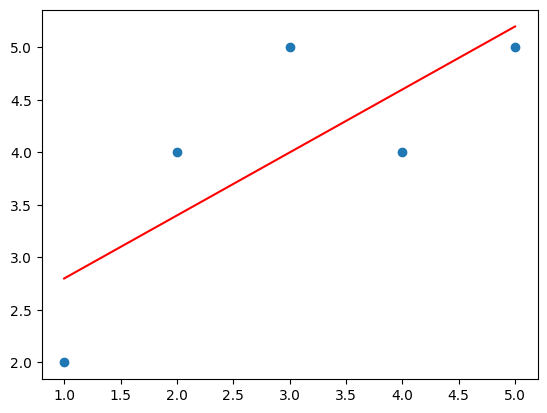

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define input data
X = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2, 4, 5, 4, 5])

# Create and train the model
model = LinearRegression().fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


#Non Linear Regression

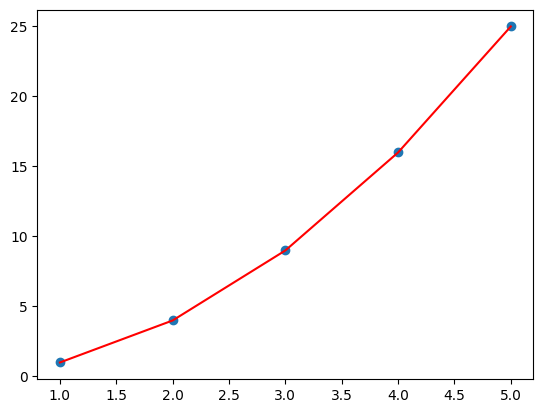

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Define input data
X = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([1, 4, 9, 16, 25])
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and train the model
model = LinearRegression().fit(X_poly, y)
# Make predictions using the model
y_pred = model.predict(X_poly)
# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


#Perceptron

In [5]:
import numpy as np
# Define input data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])
# Define the perceptron model
class Perceptron:
    def __init__(self, num_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(num_inputs + 1)
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
# Create and train the model
perceptron = Perceptron(num_inputs=2)
perceptron.train(X, y)
# Test the model
inputs = np.array([1,1])
print(perceptron.predict(inputs))  # Output: 1

0


#Perceptron with keras

In [6]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# Define input data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Create and compile the perceptron model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Test the model
inputs = np.array([1,1]).reshape(1, -1)
print(model.predict(inputs))  # Output: [[0.999]]


1/1 [==============================] - 0s 120ms/step
[[0.5620184]]


#SVM 

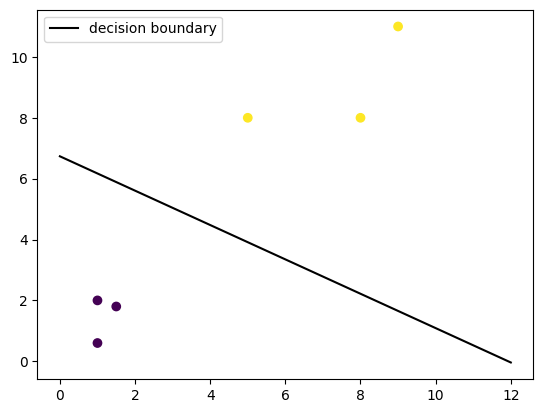

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# Define input data
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y = np.array([0, 1, 0, 1, 0, 1])
# Create and train the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Visualize the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 12)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-', label="decision boundary")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()
plt.show()

#Kernal Method

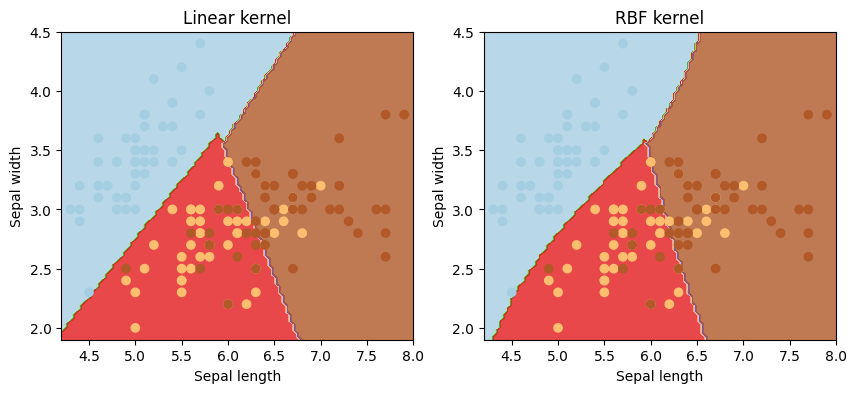

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target
# Define a function to visualize the decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
# Create and train a linear SVM model
linear_svc = svm.SVC(kernel='linear', C=1)
linear_svc.fit(X, y)
# Create and train an RBF kernel SVM model
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1)
rbf_svc.fit(X, y)
# Visualize the decision boundaries of both models
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundary(linear_svc, X, y)
plt.title('Linear kernel')
plt.subplot(122)
plot_decision_boundary(rbf_svc, X, y)
plt.title('RBF kernel')
plt.show()

# Logistic Regression

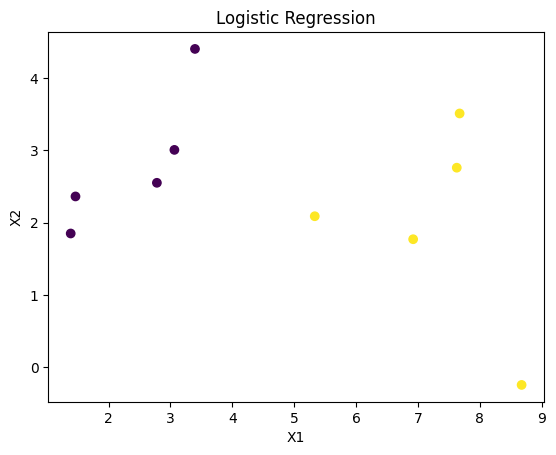

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Define input data
X = np.array([[2.7810836,2.550537003],
              [1.465489372,2.362125076],
              [3.396561688,4.400293529],
              [1.38807019,1.850220317],
              [3.06407232,3.005305973],
              [7.627531214,2.759262235],
              [5.332441248,2.088626775],
              [6.922596716,1.77106367],
              [8.675418651,-0.242068655],
              [7.673756466,3.508563011]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)
# Make predictions using the model
y_pred = model.predict(X)
# Plot the results
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression')
plt.show()


#Softmax Activation Function

In [25]:
# Import required libraries
import tensorflow as tf

# Define input data
X = tf.constant([[1.0, 2.0, 3.0], [4.0, 15.0, 6.0]])

# Define a softmax layer
softmax_layer = tf.keras.layers.Softmax(axis=-1)

# Apply the softmax activation function to the input data
y = softmax_layer(X)

# Print the output
print(y)


tf.Tensor(
[[9.0030573e-02 2.4472848e-01 6.6524094e-01]
 [1.6699361e-05 9.9985993e-01 1.2339251e-04]], shape=(2, 3), dtype=float32)


In [22]:
# Import required libraries
import numpy as np

# Define input data
x = np.array([1, 2, 3])

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Apply the softmax function to the input data
y = softmax(x)

# Print the output
print(y)


[0.09003057 0.24472847 0.66524096]


In [23]:
x = np.array([1, 2, 3])
exp_x = np.exp(x)
print(exp_x)

[ 2.71828183  7.3890561  20.08553692]


#Neural Network with Codes

In [26]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# Define input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# Define the neural network model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X, y, epochs=100, batch_size=4)

# Evaluate the model on new data
new_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
new_y = model.predict(new_X)
print(new_y)

Epoch 1/1000
1/1 [==============================] - 1s 956ms/step - loss: 0.7002 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.7000 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6998 - accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6995 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6993 - accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6990 - accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6988 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6986 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6983 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6982 - accuracy: 0.7500
Epoch 11